# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 24
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I haven't flown British Air...
1,Not Verified | My itinerary was supposed to b...
2,✅ Trip Verified | Busy day at LHR and flight ...
3,✅ Trip Verified | Worst seats I have ever enco...
4,Not Verified | Top Ten REASONS to not use Brit...


In [4]:
df.to_csv("data/BA_reviews.csv")

In [5]:
df = pd.read_csv('data/BA_reviews.csv')
df['reviews']

0       ✅ Trip Verified |  I haven't flown British Air...
1       Not Verified |  My itinerary was supposed to b...
2       ✅ Trip Verified |  Busy day at LHR and flight ...
3       ✅ Trip Verified | Worst seats I have ever enco...
4       Not Verified | Top Ten REASONS to not use Brit...
                              ...                        
2395    I think one word sums it up 'Rubbish'. The Lon...
2396    Glasgow to Bangkok via Heathrow with British A...
2397    London Heathrow to Brisbane via Singapore retu...
2398    Manchester to Mumbai via Heathrow return, an A...
2399    Rome to London with British Airways. Very upti...
Name: reviews, Length: 2400, dtype: object

### Data Preprocessing

1. Use verified reviews only to be valid and provide appropriate feedback

In [6]:
df_filtered = df[df['reviews'].str.contains('Trip Verified')]
df_filtered

,Unnamed: 0,reviews
0,0,✅ Trip Verified | I haven't flown British Air...
2,2,✅ Trip Verified | Busy day at LHR and flight ...
3,3,✅ Trip Verified | Worst seats I have ever enco...
6,6,✅ Trip Verified | Online check in worked fine...
7,7,✅ Trip Verified |. The BA first lounge at Term...
...,...,...
1236,1236,✅ Trip Verified | After 3 hour delay at airpor...
1237,1237,✅ Trip Verified | Flew British Airways from Ma...
1238,1238,✅ Trip Verified | Tel Aviv to London. We arri...
1239,1239,✅ Trip Verified | London to Tel Aviv. Arrived...


2. Clear the '✅ Trip Verified |' 

In [7]:
import numpy as np
import re

In [8]:
df_filtered['reviews'] = df_filtered['reviews'].replace('✅ Trip Verified |', '', regex=True)
df_filtered

C:\Users\Caecilia\AppData\Local\Temp/ipykernel_18092/4019044233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['reviews'] = df_filtered['reviews'].replace('✅ Trip Verified |', '', regex=True)


,Unnamed: 0,reviews
0,0,| I haven't flown British Airways before and ...
2,2,| Busy day at LHR and flight full. Lounge cro...
3,3,| Worst seats I have ever encountered in econo...
6,6,| Online check in worked fine. Quick security...
7,7,|. The BA first lounge at Terminal 5 was a zo...
...,...,...
1236,1236,"| After 3 hour delay at airport, flight destin..."
1237,1237,| Flew British Airways from Madrid to London H...
1238,1238,| Tel Aviv to London. We arrived at the airpo...
1239,1239,| London to Tel Aviv. Arrived at Heathrow at ...


3. Remove duplicate if any

In [9]:
df_filtered.drop_duplicates(inplace=True)
df_filtered

C:\Users\Caecilia\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Unnamed: 0,reviews
0,0,| I haven't flown British Airways before and ...
2,2,| Busy day at LHR and flight full. Lounge cro...
3,3,| Worst seats I have ever encountered in econo...
6,6,| Online check in worked fine. Quick security...
7,7,|. The BA first lounge at Terminal 5 was a zo...
...,...,...
1236,1236,"| After 3 hour delay at airport, flight destin..."
1237,1237,| Flew British Airways from Madrid to London H...
1238,1238,| Tel Aviv to London. We arrived at the airpo...
1239,1239,| London to Tel Aviv. Arrived at Heathrow at ...


### Classification

Classifying the text to positive, negative and netral categories. The classification is using lexicon-based method.

In [10]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [11]:
scores = [analyser.polarity_scores(x) for x in df_filtered['reviews']]
scores

[{'neg': 0.078, 'neu': 0.922, 'pos': 0.0, 'compound': -0.804},
 {'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compound': 0.9795},
 {'neg': 0.21, 'neu': 0.775, 'pos': 0.015, 'compound': -0.9678},
 {'neg': 0.0, 'neu': 0.71, 'pos': 0.29, 'compound': 0.8479},
 {'neg': 0.095, 'neu': 0.837, 'pos': 0.069, 'compound': -0.1289},
 {'neg': 0.18, 'neu': 0.768, 'pos': 0.052, 'compound': -0.9746},
 {'neg': 0.146, 'neu': 0.844, 'pos': 0.01, 'compound': -0.9649},
 {'neg': 0.166, 'neu': 0.753, 'pos': 0.081, 'compound': -0.789},
 {'neg': 0.076, 'neu': 0.901, 'pos': 0.024, 'compound': -0.6334},
 {'neg': 0.081, 'neu': 0.795, 'pos': 0.123, 'compound': 0.8782},
 {'neg': 0.086, 'neu': 0.892, 'pos': 0.021, 'compound': -0.7894},
 {'neg': 0.105, 'neu': 0.878, 'pos': 0.016, 'compound': -0.981},
 {'neg': 0.103, 'neu': 0.864, 'pos': 0.033, 'compound': -0.5719},
 {'neg': 0.168, 'neu': 0.832, 'pos': 0.0, 'compound': -0.8519},
 {'neg': 0.119, 'neu': 0.797, 'pos': 0.084, 'compound': -0.2382},
 {'neg': 0.093, 'neu': 0.872, '

In [12]:
df_filtered['Compound_Score'] = [x['compound'] for x in scores]
df_filtered.head()

C:\Users\Caecilia\AppData\Local\Temp/ipykernel_18092/3689759807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Compound_Score'] = [x['compound'] for x in scores]


,Unnamed: 0,reviews,Compound_Score
0,0,| I haven't flown British Airways before and ...,-0.8040
2,2,| Busy day at LHR and flight full. Lounge cro...,0.9795
3,3,| Worst seats I have ever encountered in econo...,-0.9678
6,6,| Online check in worked fine. Quick security...,0.8479
7,7,|. The BA first lounge at Terminal 5 was a zo...,-0.1289


In [13]:
df_filtered.loc[df_filtered['Compound_Score'] < 0, 'Sentiments'] = 'Negative'
df_filtered.loc[df_filtered['Compound_Score'] == 0, 'Sentiments'] = 'Neutral'
df_filtered.loc[df_filtered['Compound_Score'] > 0, 'Sentiments'] = 'Positive'
df_filtered.head()

C:\Users\Caecilia\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Caecilia\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Unnamed: 0,reviews,Compound_Score,Sentiments
0,0,| I haven't flown British Airways before and ...,-0.8040,Negative
2,2,| Busy day at LHR and flight full. Lounge cro...,0.9795,Positive
3,3,| Worst seats I have ever encountered in econo...,-0.9678,Negative
6,6,| Online check in worked fine. Quick security...,0.8479,Positive
7,7,|. The BA first lounge at Terminal 5 was a zo...,-0.1289,Negative


### Visualization

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

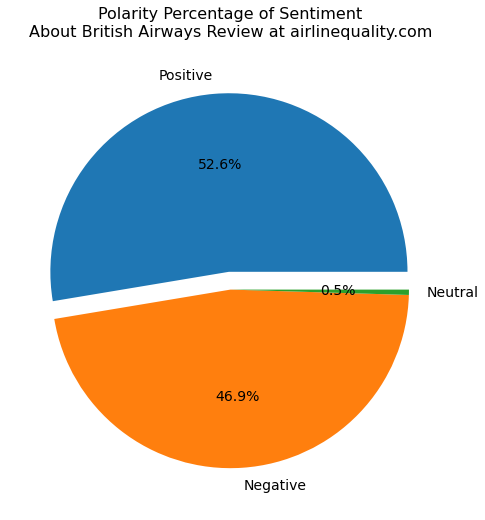

<Figure size 432x288 with 0 Axes>

In [15]:
fig, ax = plt.subplots(figsize = (8, 10))
sizes = [count for count in df_filtered['Sentiments'].value_counts()]
labels = list(df_filtered['Sentiments'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Polarity Percentage of Sentiment\nAbout British Airways Review at airlinequality.com', fontsize = 16, pad = 30)
fig.set_facecolor('white')
plt.show()
plt.savefig('pie_chart.png')

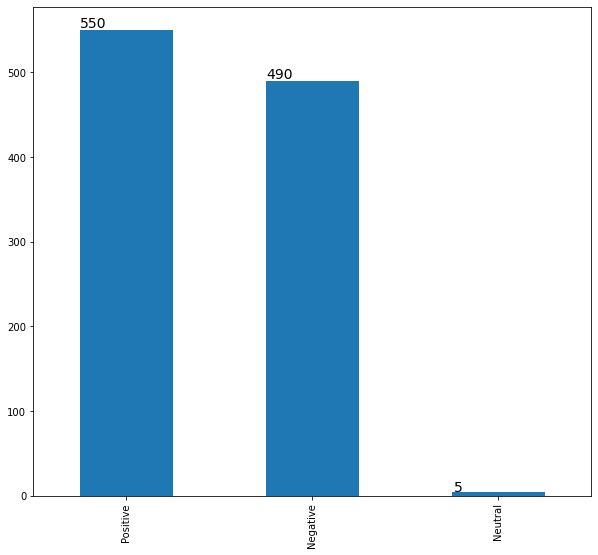

<Figure size 432x288 with 0 Axes>

In [16]:
s = pd.value_counts(df_filtered['Sentiments'])
ax = s.plot.bar(figsize = (10, 9))
plt.rcParams['axes.facecolor'] = 'white'
for p in ax.patches:
   ax.annotate("{:,}".format(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize = 14)
plt.show()
plt.savefig('bar_chart.png')

In [17]:
negative_sentiment = (df_filtered['Sentiments'] == 'Negative').sum()
print("The number of negative sentiments is:\t", negative_sentiment)
positive_sentiment = (df_filtered['Sentiments'] == 'Positive').sum()
print("The number of positive sentiments is:\t", positive_sentiment)
neutral_sentiment = (df_filtered['Sentiments'] == 'Neutral').sum()
print("The number of neutral sentiments is:\t", neutral_sentiment)
total = len(df_filtered.index)
print("The overall total of sentiments is:\t", total)

The number of negative sentiments is:	 490
The number of positive sentiments is:	 550
The number of neutral sentiments is:	 5
The overall total of sentiments is:	 1045


In [18]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from wordcloud import WordCloud

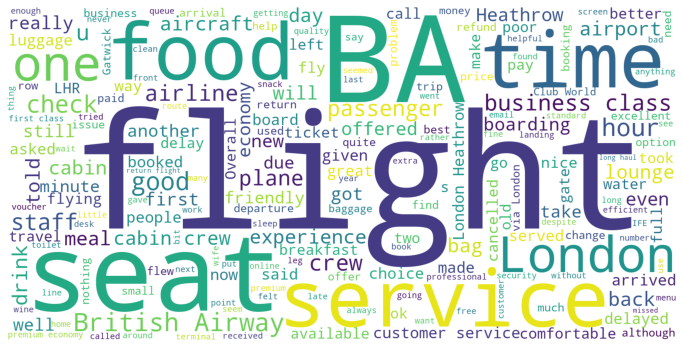

<Figure size 432x288 with 0 Axes>

In [19]:
text = " ".join(reviews for reviews in df_filtered['reviews'])
word_cloud = WordCloud(width=1600, height=800,
                       background_color='white').generate(text)
plt.figure(figsize=(12,10))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()
plt.savefig('wordcloud.png')

In [20]:
df_negative=df_filtered[df_filtered['Sentiments'].str.contains("Negative")]
df_positive=df_filtered[df_filtered['Sentiments'].str.contains("Positive")]

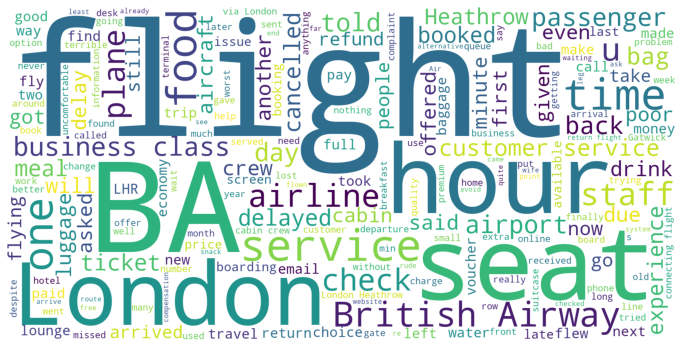

<Figure size 432x288 with 0 Axes>

In [21]:
text = " ".join(reviews for reviews in df_negative['reviews'])
word_cloud = WordCloud(width=1600, height=800,
                       background_color='white').generate(text)
plt.figure(figsize=(12,10))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()
plt.savefig('wordcloud.png')

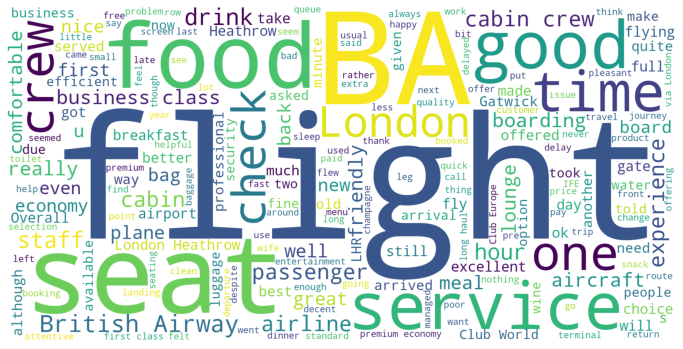

<Figure size 432x288 with 0 Axes>

In [22]:
text = " ".join(reviews for reviews in df_positive['reviews'])
word_cloud = WordCloud(width=1600, height=800,
                       background_color='white').generate(text)
plt.figure(figsize=(12,10))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()
plt.savefig('wordcloud.png')